In [1]:
from colorama import Fore, Back, Style 
import pickle
import pandas as pd
import os
import numpy as np
import scattertext as st
import seaborn as sns
from missingpy import KNNImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ARDRegression
from sklearn.ensemble import BaggingRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans

from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir(r'C:\Users\gwhit\Desktop\Gavin\1st semester\STAT 517 Learning-Predictive Modeling\Final Project\data')
scorecardfn = 'usa_00007.csv'
scorecard = pd.read_csv(scorecardfn)

In [4]:
scorecard.shape

(3156487, 72)

In [5]:
scorecard.dtypes

YEAR          int64
DATANUM       int64
SERIAL        int64
HHWT          int64
STATEFIP      int64
GQ            int64
OWNERSHP      int64
OWNERSHPD     int64
MORTGAGE      int64
ACREHOUS      int64
MORTAMT1      int64
MORTAMT2      int64
RENT          int64
COSTELEC      int64
COSTGAS       int64
COSTWATR      int64
COSTFUEL      int64
FRIDGE        int64
PHONE         int64
CINETHH       int64
CILAPTOP      int64
CISMRTPHN     int64
CITABLET      int64
CIDATAPLN     int64
CIHISPEED     int64
CISAT         int64
CIDIAL        int64
CIOTHSVC      int64
FUELHEAT      int64
VEHICLES      int64
              ...  
FERTYR        int64
RACE          int64
RACED         int64
HISPAN        int64
HISPAND       int64
CITIZEN       int64
SPEAKENG      int64
HCOVANY       int64
HCOVPRIV      int64
HCOVPUB       int64
EDUC          int64
EDUCD         int64
SCHLTYPE      int64
DEGFIELD2     int64
DEGFIELD2D    int64
EMPSTAT       int64
EMPSTATD      int64
LABFORCE      int64
OCC           int64


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
scorecard.head()

,YEAR,DATANUM,SERIAL,HHWT,STATEFIP,GQ,OWNERSHP,OWNERSHPD,MORTGAGE,ACREHOUS,MORTAMT1,MORTAMT2,RENT,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,FRIDGE,PHONE,CINETHH,CILAPTOP,CISMRTPHN,CITABLET,CIDATAPLN,CIHISPEED,CISAT,CIDIAL,CIOTHSVC,FUELHEAT,VEHICLES,PERNUM,PERWT,FAMSIZE,SFTYPE,ELDCH,YNGCH,RELATE,RELATED,SEX,AGE,MARST,MARRNO,FERTYR,RACE,RACED,HISPAN,HISPAND,CITIZEN,SPEAKENG,HCOVANY,HCOVPRIV,HCOVPUB,EDUC,EDUCD,SCHLTYPE,DEGFIELD2,DEGFIELD2D,EMPSTAT,EMPSTATD,LABFORCE,OCC,IND,CLASSWKR,CLASSWKRD,WKSWORK2,UHRSWORK,INCTOT,FTOTINC,INCWAGE,INCSS,INCOTHER,TRANTIME
0,2016,1,1,97,1,1,1,12,1,1,0,0,0,1920,360,800,9993,2,2,1,1,2,2,2,10,2,2,2,2,2,1,98,2,0,99,99,1,101,2,84,1,1,0,1,100,0,0,0,3,2,2,2,7,71,1,0,0,3,30,1,0,0,0,0,0,0,22510,36610,0,8100,4200,0
1,2016,1,1,97,1,1,1,12,1,1,0,0,0,1920,360,800,9993,2,2,1,1,2,2,2,10,2,2,2,2,2,2,89,2,0,99,99,2,201,1,84,1,1,0,1,100,0,0,0,3,2,2,2,10,101,1,0,0,3,30,1,0,0,0,0,0,0,14100,36610,0,14100,0,0
2,2016,1,2,95,1,1,1,13,3,1,180,0,0,4680,9993,480,9993,2,2,3,2,2,2,0,0,0,0,0,4,1,1,95,1,0,99,99,1,101,2,78,4,2,0,1,100,0,0,0,3,2,2,2,7,71,1,0,0,1,10,2,5700,8190,2,22,6,40,45800,45800,27300,18500,0,50
3,2016,1,3,159,1,1,1,13,3,1,720,0,0,1560,9993,650,9993,2,2,1,1,1,1,1,10,2,2,2,4,4,1,160,4,0,20,16,1,101,1,46,1,1,0,1,100,0,0,0,3,2,2,1,8,81,1,0,0,1,10,2,1550,7290,2,22,6,40,65000,65000,65000,0,0,20
4,2016,1,3,159,1,1,1,13,3,1,720,0,0,1560,9993,650,9993,2,2,1,1,1,1,1,10,2,2,2,4,4,2,154,4,0,20,16,2,201,2,52,1,3,0,1,100,0,0,0,3,2,2,1,6,65,1,0,0,3,30,1,0,0,0,0,0,0,0,65000,0,0,0,0


In [8]:
scorecard.columns

Index(['YEAR', 'DATANUM', 'SERIAL', 'HHWT', 'STATEFIP', 'GQ', 'OWNERSHP',
       'OWNERSHPD', 'MORTGAGE', 'ACREHOUS', 'MORTAMT1', 'MORTAMT2', 'RENT',
       'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL', 'FRIDGE', 'PHONE',
       'CINETHH', 'CILAPTOP', 'CISMRTPHN', 'CITABLET', 'CIDATAPLN',
       'CIHISPEED', 'CISAT', 'CIDIAL', 'CIOTHSVC', 'FUELHEAT', 'VEHICLES',
       'PERNUM', 'PERWT', 'FAMSIZE', 'SFTYPE', 'ELDCH', 'YNGCH', 'RELATE',
       'RELATED', 'SEX', 'AGE', 'MARST', 'MARRNO', 'FERTYR', 'RACE', 'RACED',
       'HISPAN', 'HISPAND', 'CITIZEN', 'SPEAKENG', 'HCOVANY', 'HCOVPRIV',
       'HCOVPUB', 'EDUC', 'EDUCD', 'SCHLTYPE', 'DEGFIELD2', 'DEGFIELD2D',
       'EMPSTAT', 'EMPSTATD', 'LABFORCE', 'OCC', 'IND', 'CLASSWKR',
       'CLASSWKRD', 'WKSWORK2', 'UHRSWORK', 'INCTOT', 'FTOTINC', 'INCWAGE',
       'INCSS', 'INCOTHER', 'TRANTIME'],
      dtype='object')

# PreProcessing

First we need to get rid of all of the columns that we can't use in analysis. 

In [9]:
scorecard = scorecard.drop(['YEAR','DATANUM','SERIAL','HHWT','OWNERSHPD','CISAT','CIDIAL','CIOTHSVC','PERNUM','PERWT','MARST','RACED','HISPAND','EDUCD','DEGFIELD2D','EMPSTATD','LABFORCE','OCC','IND','CLASSWKRD','RELATED'], axis = 1) #drops the now redundant columns

Now we need to create dummy variables for the City and state because they are not numeric.

In [10]:
scorecard = pd.get_dummies(scorecard, columns =[u'STATEFIP','GQ','OWNERSHP','MORTGAGE','ACREHOUS','FRIDGE','PHONE','CINETHH','CILAPTOP','CISMRTPHN','CITABLET','CIDATAPLN','CIHISPEED','FUELHEAT','VEHICLES','SFTYPE','RELATE','SEX','MARRNO','FERTYR','RACE','HISPAN','CITIZEN','SPEAKENG','HCOVANY','HCOVPRIV','HCOVPUB','SCHLTYPE','DEGFIELD2','EMPSTAT','CLASSWKR'])

In [11]:
scorecard.columns

Index(['MORTAMT1', 'MORTAMT2', 'RENT', 'COSTELEC', 'COSTGAS', 'COSTWATR',
       'COSTFUEL', 'FAMSIZE', 'ELDCH', 'YNGCH',
       ...
       'DEGFIELD2_61', 'DEGFIELD2_62', 'DEGFIELD2_64', 'EMPSTAT_0',
       'EMPSTAT_1', 'EMPSTAT_2', 'EMPSTAT_3', 'CLASSWKR_0', 'CLASSWKR_1',
       'CLASSWKR_2'],
      dtype='object', length=240)

In [12]:
scorecard['INCOTHER'] = scorecard['INCOTHER'].replace(99999, np.nan)
scorecard['INCSS'] = scorecard['INCSS'].replace(99999, np.nan)
scorecard['INCWAGE'] = scorecard['INCWAGE'].replace(999999, np.nan)
scorecard['INCWAGE'] = scorecard['INCWAGE'].replace(999998, np.nan)
scorecard['FTOTINC'] = scorecard['FTOTINC'].replace(9999999, np.nan)
scorecard['INCTOT'] = scorecard['INCTOT'].replace(9999999, np.nan)

Originally I imputed all of the missing values using KNN imputer, but because I had to take a 1% sample of the data for performance I decided to drop all rows with any missing values to ensure the data I was working with was of high quality

In [13]:
scorecard = scorecard.dropna()

This dataset is huge. In order to be able to work with it on my hardware I'm going to take 1% random sample

In [14]:
scorecard = scorecard.sample(n=31564,random_state=1)

In [15]:
scorecard.shape

(31564, 240)

In [16]:
scorecard.dtypes

MORTAMT1          int64
MORTAMT2          int64
RENT              int64
COSTELEC          int64
COSTGAS           int64
COSTWATR          int64
COSTFUEL          int64
FAMSIZE           int64
ELDCH             int64
YNGCH             int64
AGE               int64
EDUC              int64
WKSWORK2          int64
UHRSWORK          int64
INCTOT          float64
FTOTINC         float64
INCWAGE         float64
INCSS           float64
INCOTHER        float64
TRANTIME          int64
STATEFIP_1        uint8
STATEFIP_2        uint8
STATEFIP_4        uint8
STATEFIP_5        uint8
STATEFIP_6        uint8
STATEFIP_8        uint8
STATEFIP_9        uint8
STATEFIP_10       uint8
STATEFIP_11       uint8
STATEFIP_12       uint8
                 ...   
DEGFIELD2_33      uint8
DEGFIELD2_34      uint8
DEGFIELD2_35      uint8
DEGFIELD2_36      uint8
DEGFIELD2_37      uint8
DEGFIELD2_38      uint8
DEGFIELD2_40      uint8
DEGFIELD2_41      uint8
DEGFIELD2_48      uint8
DEGFIELD2_49      uint8
DEGFIELD2_50    

In [17]:
scorecard.head()

,MORTAMT1,MORTAMT2,RENT,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,FAMSIZE,ELDCH,YNGCH,AGE,EDUC,WKSWORK2,UHRSWORK,INCTOT,FTOTINC,INCWAGE,INCSS,INCOTHER,TRANTIME,STATEFIP_1,STATEFIP_2,STATEFIP_4,STATEFIP_5,STATEFIP_6,STATEFIP_8,STATEFIP_9,STATEFIP_10,STATEFIP_11,STATEFIP_12,STATEFIP_13,STATEFIP_15,STATEFIP_16,STATEFIP_17,STATEFIP_18,STATEFIP_19,STATEFIP_20,STATEFIP_21,STATEFIP_22,STATEFIP_23,STATEFIP_24,STATEFIP_25,STATEFIP_26,STATEFIP_27,STATEFIP_28,STATEFIP_29,STATEFIP_30,STATEFIP_31,STATEFIP_32,STATEFIP_33,STATEFIP_34,STATEFIP_35,STATEFIP_36,STATEFIP_37,STATEFIP_38,STATEFIP_39,STATEFIP_40,STATEFIP_41,STATEFIP_42,STATEFIP_44,STATEFIP_45,STATEFIP_46,STATEFIP_47,STATEFIP_48,STATEFIP_49,STATEFIP_50,STATEFIP_51,STATEFIP_53,STATEFIP_54,STATEFIP_55,STATEFIP_56,GQ_1,GQ_2,GQ_3,GQ_4,GQ_5,OWNERSHP_0,OWNERSHP_1,OWNERSHP_2,MORTGAGE_0,MORTGAGE_1,MORTGAGE_3,MORTGAGE_4,ACREHOUS_0,ACREHOUS_1,ACREHOUS_2,FRIDGE_0,FRIDGE_1,FRIDGE_2,PHONE_0,PHONE_1,PHONE_2,PHONE_8,CINETHH_0,CINETHH_1,CINETHH_2,CINETHH_3,CILAPTOP_0,CILAPTOP_1,CILAPTOP_2,CISMRTPHN_0,CISMRTPHN_1,CISMRTPHN_2,CITABLET_0,CITABLET_1,CITABLET_2,CIDATAPLN_0,CIDATAPLN_1,CIDATAPLN_2,CIHISPEED_0,CIHISPEED_10,CIHISPEED_20,FUELHEAT_0,FUELHEAT_1,FUELHEAT_2,FUELHEAT_3,FUELHEAT_4,FUELHEAT_5,FUELHEAT_6,FUELHEAT_7,FUELHEAT_8,FUELHEAT_9,VEHICLES_0,VEHICLES_1,VEHICLES_2,VEHICLES_3,VEHICLES_4,VEHICLES_5,VEHICLES_6,VEHICLES_9,SFTYPE_0,SFTYPE_1,SFTYPE_2,SFTYPE_3,SFTYPE_4,SFTYPE_5,SFTYPE_6,SFTYPE_7,SFTYPE_8,RELATE_1,RELATE_2,RELATE_3,RELATE_4,RELATE_5,RELATE_6,RELATE_7,RELATE_8,RELATE_9,RELATE_10,RELATE_11,RELATE_12,RELATE_13,SEX_1,SEX_2,MARRNO_0,MARRNO_1,MARRNO_2,MARRNO_3,FERTYR_0,FERTYR_1,FERTYR_2,RACE_1,RACE_2,RACE_3,RACE_4,RACE_5,RACE_6,RACE_7,RACE_8,RACE_9,HISPAN_0,HISPAN_1,HISPAN_2,HISPAN_3,HISPAN_4,CITIZEN_0,CITIZEN_1,CITIZEN_2,CITIZEN_3,SPEAKENG_0,SPEAKENG_1,SPEAKENG_3,SPEAKENG_4,SPEAKENG_5,SPEAKENG_6,HCOVANY_1,HCOVANY_2,HCOVPRIV_1,HCOVPRIV_2,HCOVPUB_1,HCOVPUB_2,SCHLTYPE_0,SCHLTYPE_1,SCHLTYPE_2,SCHLTYPE_3,DEGFIELD2_0,DEGFIELD2_11,DEGFIELD2_13,DEGFIELD2_14,DEGFIELD2_15,DEGFIELD2_19,DEGFIELD2_20,DEGFIELD2_21,DEGFIELD2_22,DEGFIELD2_23,DEGFIELD2_24,DEGFIELD2_25,DEGFIELD2_26,DEGFIELD2_29,DEGFIELD2_32,DEGFIELD2_33,DEGFIELD2_34,DEGFIELD2_35,DEGFIELD2_36,DEGFIELD2_37,DEGFIELD2_38,DEGFIELD2_40,DEGFIELD2_41,DEGFIELD2_48,DEGFIELD2_49,DEGFIELD2_50,DEGFIELD2_51,DEGFIELD2_52,DEGFIELD2_53,DEGFIELD2_54,DEGFIELD2_55,DEGFIELD2_56,DEGFIELD2_57,DEGFIELD2_59,DEGFIELD2_60,DEGFIELD2_61,DEGFIELD2_62,DEGFIELD2_64,EMPSTAT_0,EMPSTAT_1,EMPSTAT_2,EMPSTAT_3,CLASSWKR_0,CLASSWKR_1,CLASSWKR_2
1786808,2000,0,0,1920,1080,80,9993,4,13,7,35,11,6,52,105800.0,105800.0,97000.0,0.0,8800.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76868,1100,0,0,480,480,1200,9993,1,99,99,44,10,4,40,39000.0,39000.0,37000.0,0.0,0.0,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3093281,1100,400,0,1200,9993,9993,100,2,99,99,50,8,6,50,55000.0,90000.0,55000.0,0.0,0.0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,

# Analysis

# Partitioning the Data Set

In [18]:
Y_scorecard = scorecard[r'UHRSWORK']
X_scorecard = scorecard.drop(r'UHRSWORK', axis=1)

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scorecard, Y_scorecard, random_state=9)
Xcolnames = list(X_scorecard)

In [20]:
X_scorecard.head()

,MORTAMT1,MORTAMT2,RENT,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,FAMSIZE,ELDCH,YNGCH,AGE,EDUC,WKSWORK2,INCTOT,FTOTINC,INCWAGE,INCSS,INCOTHER,TRANTIME,STATEFIP_1,STATEFIP_2,STATEFIP_4,STATEFIP_5,STATEFIP_6,STATEFIP_8,STATEFIP_9,STATEFIP_10,STATEFIP_11,STATEFIP_12,STATEFIP_13,STATEFIP_15,STATEFIP_16,STATEFIP_17,STATEFIP_18,STATEFIP_19,STATEFIP_20,STATEFIP_21,STATEFIP_22,STATEFIP_23,STATEFIP_24,STATEFIP_25,STATEFIP_26,STATEFIP_27,STATEFIP_28,STATEFIP_29,STATEFIP_30,STATEFIP_31,STATEFIP_32,STATEFIP_33,STATEFIP_34,STATEFIP_35,STATEFIP_36,STATEFIP_37,STATEFIP_38,STATEFIP_39,STATEFIP_40,STATEFIP_41,STATEFIP_42,STATEFIP_44,STATEFIP_45,STATEFIP_46,STATEFIP_47,STATEFIP_48,STATEFIP_49,STATEFIP_50,STATEFIP_51,STATEFIP_53,STATEFIP_54,STATEFIP_55,STATEFIP_56,GQ_1,GQ_2,GQ_3,GQ_4,GQ_5,OWNERSHP_0,OWNERSHP_1,OWNERSHP_2,MORTGAGE_0,MORTGAGE_1,MORTGAGE_3,MORTGAGE_4,ACREHOUS_0,ACREHOUS_1,ACREHOUS_2,FRIDGE_0,FRIDGE_1,FRIDGE_2,PHONE_0,PHONE_1,PHONE_2,PHONE_8,CINETHH_0,CINETHH_1,CINETHH_2,CINETHH_3,CILAPTOP_0,CILAPTOP_1,CILAPTOP_2,CISMRTPHN_0,CISMRTPHN_1,CISMRTPHN_2,CITABLET_0,CITABLET_1,CITABLET_2,CIDATAPLN_0,CIDATAPLN_1,CIDATAPLN_2,CIHISPEED_0,CIHISPEED_10,CIHISPEED_20,FUELHEAT_0,FUELHEAT_1,FUELHEAT_2,FUELHEAT_3,FUELHEAT_4,FUELHEAT_5,FUELHEAT_6,FUELHEAT_7,FUELHEAT_8,FUELHEAT_9,VEHICLES_0,VEHICLES_1,VEHICLES_2,VEHICLES_3,VEHICLES_4,VEHICLES_5,VEHICLES_6,VEHICLES_9,SFTYPE_0,SFTYPE_1,SFTYPE_2,SFTYPE_3,SFTYPE_4,SFTYPE_5,SFTYPE_6,SFTYPE_7,SFTYPE_8,RELATE_1,RELATE_2,RELATE_3,RELATE_4,RELATE_5,RELATE_6,RELATE_7,RELATE_8,RELATE_9,RELATE_10,RELATE_11,RELATE_12,RELATE_13,SEX_1,SEX_2,MARRNO_0,MARRNO_1,MARRNO_2,MARRNO_3,FERTYR_0,FERTYR_1,FERTYR_2,RACE_1,RACE_2,RACE_3,RACE_4,RACE_5,RACE_6,RACE_7,RACE_8,RACE_9,HISPAN_0,HISPAN_1,HISPAN_2,HISPAN_3,HISPAN_4,CITIZEN_0,CITIZEN_1,CITIZEN_2,CITIZEN_3,SPEAKENG_0,SPEAKENG_1,SPEAKENG_3,SPEAKENG_4,SPEAKENG_5,SPEAKENG_6,HCOVANY_1,HCOVANY_2,HCOVPRIV_1,HCOVPRIV_2,HCOVPUB_1,HCOVPUB_2,SCHLTYPE_0,SCHLTYPE_1,SCHLTYPE_2,SCHLTYPE_3,DEGFIELD2_0,DEGFIELD2_11,DEGFIELD2_13,DEGFIELD2_14,DEGFIELD2_15,DEGFIELD2_19,DEGFIELD2_20,DEGFIELD2_21,DEGFIELD2_22,DEGFIELD2_23,DEGFIELD2_24,DEGFIELD2_25,DEGFIELD2_26,DEGFIELD2_29,DEGFIELD2_32,DEGFIELD2_33,DEGFIELD2_34,DEGFIELD2_35,DEGFIELD2_36,DEGFIELD2_37,DEGFIELD2_38,DEGFIELD2_40,DEGFIELD2_41,DEGFIELD2_48,DEGFIELD2_49,DEGFIELD2_50,DEGFIELD2_51,DEGFIELD2_52,DEGFIELD2_53,DEGFIELD2_54,DEGFIELD2_55,DEGFIELD2_56,DEGFIELD2_57,DEGFIELD2_59,DEGFIELD2_60,DEGFIELD2_61,DEGFIELD2_62,DEGFIELD2_64,EMPSTAT_0,EMPSTAT_1,EMPSTAT_2,EMPSTAT_3,CLASSWKR_0,CLASSWKR_1,CLASSWKR_2
1786808,2000,0,0,1920,1080,80,9993,4,13,7,35,11,6,105800.0,105800.0,97000.0,0.0,8800.0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
76868,1100,0,0,480,480,1200,9993,1,99,99,44,10,4,39000.0,39000.0,37000.0,0.0,0.0,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3093281,1100,400,0,1200,9993,9993,100,2,99,99,50,8,6,55000.0,90000.0,55000.0,0.0,0.0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,

# Principle Component Analysis 

In [21]:
scaler = StandardScaler()
scaler.fit(X_scorecard)
X_scaled = scaler.transform(X_scorecard)


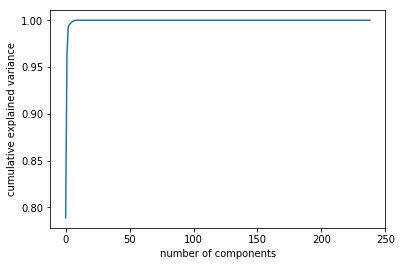

In [19]:
pca = PCA().fit(X_scorecard)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

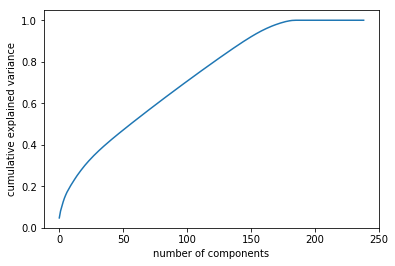

In [20]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [17]:
pca = PCA(n_components=200)
pca.fit(X_scaled)
X_scorecard_200PCA = pca.transform(X_scaled)

# Determine Optimal Number of Clusters

In [ ]:
n_components = np.arange(1, 31)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_scorecard_200PCA)
          for n in n_components]

plt.plot(n_components, [m.bic(X_scorecard_200PCA) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_scorecard_200PCA) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [22]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scorecard)
    kmeanModel.fit(X_scorecard)
    distortions.append(sum(np.min(cdist(X_scorecard, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scorecard.shape[0])

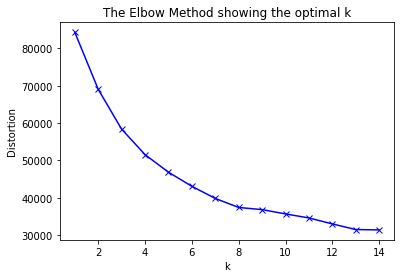

In [23]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Clustering

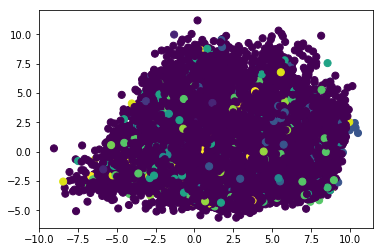

In [24]:
#Clustering with 200 PC's using Spectral Clustering
model = SpectralClustering(n_clusters=20, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_scorecard_200PCA)
plt.scatter(X_scorecard_200PCA[:, 0], X_scorecard_200PCA[:, 1], c=labels,
            s=50, cmap='viridis');

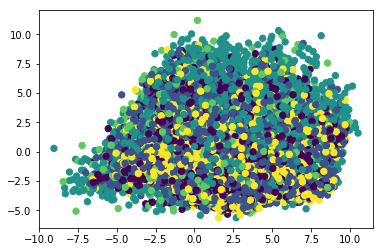

In [25]:
#Clustering with 200 PC's using Gaussian Mixture Modeling 
gmm = GMM(n_components=5).fit(X_scorecard_200PCA)
labels = gmm.predict(X_scorecard_200PCA)
plt.scatter(X_scorecard_200PCA[:, 0], X_scorecard_200PCA[:, 1], c=labels, s=40, cmap='viridis');

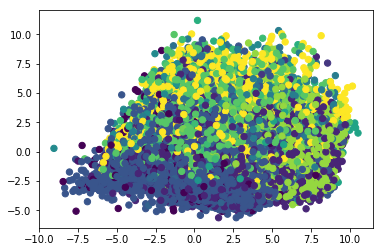

In [26]:
#Clustering with 200 PC's using Agglomerative Clustering: Recursively merges
#pair of clusters that minimally increases a given linkage distance
clustering = AgglomerativeClustering(n_clusters=20).fit(X_scorecard_200PCA)
labels = clustering.labels_
plt.scatter(X_scorecard_200PCA[:, 0], X_scorecard_200PCA[:, 1], c=labels, s=40, cmap='viridis')

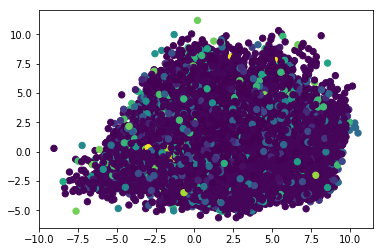

In [27]:
#Clustering with 200 PC's using DBSCAN
db = DBSCAN(eps=0.3, min_samples=10,metric='cosine').fit(X_scorecard_200PCA)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
plt.scatter(X_scorecard_200PCA[:, 0], X_scorecard_200PCA[:, 1], c=labels, s=40, cmap='viridis')

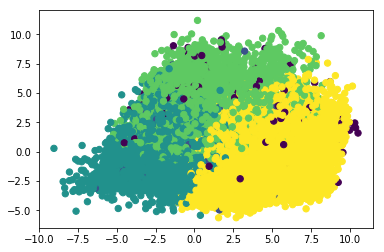

In [28]:
#Clustering with 200 PC's using MiniBatchKmeans
clustering = MiniBatchKMeans(n_clusters=5).fit(X_scorecard_200PCA)
labels = clustering.labels_
plt.scatter(X_scorecard_200PCA[:, 0], X_scorecard_200PCA[:, 1], c=labels, s=40, cmap='viridis')

# Seriation

Unfortunately causes crash with current hardware.

In [29]:
#def seriation(Z,N,cur_index):
#    '''
#        input:
#            - Z is a hierarchical tree (dendrogram)
#            - N is the number of points given to the clustering process
#            - cur_index is the position in the tree for the recursive traversal
#        output:
#            - order implied by the hierarchical tree Z
#            
#        seriation computes the order implied by a hierarchical tree (dendrogram)
#    '''
#    if cur_index < N:
#        return [cur_index]
#    else:
#        left = int(Z[cur_index-N,0])
#        right = int(Z[cur_index-N,1])
#        return (seriation(Z,N,left) + seriation(Z,N,right))
#    
#def compute_serial_matrix(dist_mat,method="ward"):
#    '''
#        input:
#            - dist_mat is a distance matrix
#            - method = ["ward","single","average","complete"]
#        output:
#            - seriated_dist is the input dist_mat,
#              but with re-ordered rows and columns
#              according to the seriation, i.e. the
#              order implied by the hierarchical tree
#            - res_order is the order implied by
#              the hierarhical tree
#            - res_linkage is the hierarhical tree (dendrogram)
#        
#        compute_serial_matrix transforms a distance matrix into 
#        a sorted distance matrix according to the order implied 
#        by the hierarchical tree (dendrogram)
#    '''
#    N = len(dist_mat)
#    flat_dist_mat = squareform(dist_mat)
#    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
#    res_order = seriation(res_linkage, N, N + N-2)
#    seriated_dist = np.zeros((N,N))
#    a,b = np.triu_indices(N,k=1)
#    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
#    seriated_dist[b,a] = seriated_dist[a,b]
#    
#    return seriated_dist, res_order, res_linkage

In [ ]:
#N = len(X_scorecard_200PCA)
#X = X_scorecard_200PCA[np.random.permutation(N),:]
#
#dist_mat = squareform(pdist(X))
#
#plt.pcolormesh(dist_mat)
#plt.xlim([0,N])
#plt.ylim([0,N])
#plt.show()

In [ ]:
#dist_mat = squareform(pdist(X_scorecard))
#
#N = len(X_scorecard)
#plt.pcolormesh(X_scorecard)
#plt.colorbar()
#plt.xlim([0,N])
#plt.ylim([0,N])
#plt.show()

In [ ]:
#methods = ["ward","single","average","complete"]
#for method in methods:
#    print("------------------------------------------------------------------------------------------")
#    print("Method:\t",method)
#    
#    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
#    
#    plt.pcolormesh(ordered_dist_mat)
#    plt.xlim([0,N])
#   plt.ylim([0,N])
#    plt.show()

# Resplitting Using Scaled Data

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, Y_scorecard, random_state=9)
Xcolnames = list(X_scaled)

# Linear Regression

In [23]:
lr = LinearRegression().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lr.score(Xtest, ytest)))

Training set score: 0.80
Test set score: 0.79


In [24]:
scores = cross_val_score(lr, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


# Ridge Regression¶

In [25]:
ridge = Ridge().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(ridge.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(ridge.score(Xtest, ytest)))

Training set score: 0.80
Test set score: 0.79


In [26]:
scores = cross_val_score(ridge, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


In [27]:
ridge10 = Ridge(alpha=10).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(ridge10.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(ridge10.score(Xtest, ytest)))

Training set score: 0.80
Test set score: 0.79


In [28]:
scores = cross_val_score(ridge10, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


# K Nearest Neighbors Regressor

In [29]:
# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(Xtrain, ytrain)
print("Test set R^2: {:.2f}".format(reg.score(Xtest, ytest)))

Test set R^2: 0.55


In [30]:
scores = cross_val_score(reg, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.70


In [31]:
# instantiate the model and set the number of neighbors to consider to 50:
reg = KNeighborsRegressor(n_neighbors=50)
# fit the model using the training data and training targets:
reg.fit(Xtrain, ytrain)
print("Test set R^2: {:.2f}".format(reg.score(Xtest, ytest)))

Test set R^2: 0.58


In [32]:
scores = cross_val_score(reg, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.74


In [33]:
# instantiate the model and set the number of neighbors to consider to 150:
reg = KNeighborsRegressor(n_neighbors=150)
# fit the model using the training data and training targets:
reg.fit(Xtrain, ytrain)
print("Test set R^2: {:.2f}".format(reg.score(Xtest, ytest)))

Test set R^2: 0.57


In [34]:
scores = cross_val_score(reg, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.72


# Lasso

In [35]:
lasso = Lasso().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.79
Test set score: 0.78
Number of features used: 7


In [36]:
scores = cross_val_score(lasso, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.78


In [37]:
lasso001 = Lasso(alpha=0.9, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.79
Test set score: 0.78
Number of features used: 9


In [38]:
scores = cross_val_score(lasso001, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.78


In [39]:
lasso01 = Lasso(alpha=0.1, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.79
Test set score: 0.78
Number of features used: 9


In [40]:
scores = cross_val_score(lasso01, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


In [41]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.80
Test set score: 0.79
Number of features used: 173


In [42]:
scores = cross_val_score(lasso001, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso00001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso00001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.80
Test set score: 0.79
Number of features used: 197


In [44]:
scores = cross_val_score(lasso00001, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


# Decision Tree Regressor

In [45]:
tree = DecisionTreeRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(tree.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(tree.score(Xtest, ytest)))

Training set score: 1.00
Test set score: 0.72


In [46]:
scores = cross_val_score(tree, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.71


# Ada Boost Regressor

In [47]:
abtr = AdaBoostRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(abtr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(abtr.score(Xtest, ytest)))

Training set score: 0.77
Test set score: 0.76


In [48]:
scores = cross_val_score(abtr, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.79


# Extra Trees Regressor

In [49]:
etr = ExtraTreesRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(etr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(etr.score(Xtest, ytest)))

Training set score: 1.00
Test set score: 0.84


In [50]:
scores = cross_val_score(etr, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.84


Feature ranking:
1. feature 233 (0.410334)
2. feature 12 (0.377795)
3. feature 15 (0.027685)
4. feature 13 (0.016014)
5. feature 191 (0.005578)
6. feature 235 (0.005489)
7. feature 10 (0.004683)
8. feature 151 (0.003572)
9. feature 11 (0.003516)
10. feature 3 (0.003502)
11. feature 14 (0.003480)
12. feature 152 (0.003383)
13. feature 18 (0.003154)
14. feature 16 (0.003053)
15. feature 188 (0.002944)
16. feature 238 (0.002910)
17. feature 0 (0.002658)
18. feature 7 (0.002590)
19. feature 236 (0.002581)
20. feature 189 (0.002442)
21. feature 4 (0.002430)
22. feature 5 (0.002263)
23. feature 140 (0.002185)
24. feature 1 (0.001847)
25. feature 123 (0.001831)
26. feature 8 (0.001805)
27. feature 237 (0.001780)
28. feature 138 (0.001669)
29. feature 2 (0.001663)
30. feature 9 (0.001619)
31. feature 62 (0.001557)
32. feature 155 (0.001554)
33. feature 154 (0.001506)
34. feature 124 (0.001465)
35. feature 79 (0.001422)
36. feature 28 (0.001413)
37. feature 115 (0.001410)
38. feature 139 (0.001

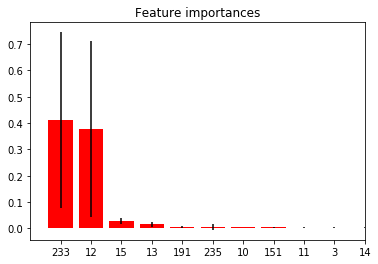

In [51]:
importances = etr.feature_importances_
std = np.std([tree.feature_importances_ for tree in etr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_scorecard.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_scorecard.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_scorecard.shape[1]), indices)
plt.xlim([-1, 10])
plt.show()

# Random Forest Regressor

In [52]:
rfr = RandomForestRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(rfr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(rfr.score(Xtest, ytest)))

Training set score: 0.97
Test set score: 0.85


In [53]:
scores = cross_val_score(rfr, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.84


Feature ranking:
1. feature 12 (0.766176)
2. feature 15 (0.081599)
3. feature 13 (0.014779)
4. feature 14 (0.010432)
5. feature 10 (0.009107)
6. feature 3 (0.007479)
7. feature 18 (0.006163)
8. feature 5 (0.005317)
9. feature 16 (0.004746)
10. feature 0 (0.004725)
11. feature 4 (0.004511)
12. feature 11 (0.003947)
13. feature 2 (0.003232)
14. feature 238 (0.003126)
15. feature 8 (0.002754)
16. feature 7 (0.002662)
17. feature 9 (0.002469)
18. feature 151 (0.002021)
19. feature 6 (0.001543)
20. feature 152 (0.001456)
21. feature 191 (0.001335)
22. feature 1 (0.001324)
23. feature 17 (0.001076)
24. feature 155 (0.000970)
25. feature 62 (0.000955)
26. feature 123 (0.000935)
27. feature 237 (0.000912)
28. feature 124 (0.000902)
29. feature 139 (0.000883)
30. feature 160 (0.000838)
31. feature 115 (0.000835)
32. feature 154 (0.000797)
33. feature 84 (0.000784)
34. feature 113 (0.000772)
35. feature 138 (0.000756)
36. feature 23 (0.000730)
37. feature 57 (0.000726)
38. feature 28 (0.000707)


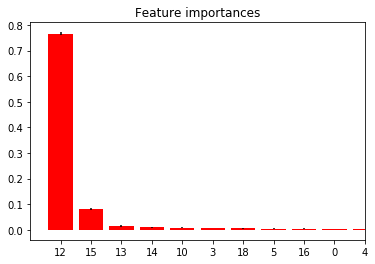

In [54]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_scorecard.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_scorecard.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_scorecard.shape[1]), indices)
plt.xlim([-1, 10])
plt.show()

# Bagging Regressor

In [55]:
bingr = BaggingRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(bingr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(bingr.score(Xtest, ytest)))

Training set score: 0.97
Test set score: 0.84


In [56]:
scores = cross_val_score(bingr, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.84


In [57]:
bingr = BaggingRegressor(n_estimators = 5).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(bingr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(bingr.score(Xtest, ytest)))

Training set score: 0.96
Test set score: 0.83


In [58]:
scores = cross_val_score(bingr, X_scorecard, Y_scorecard, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.83


# Dendrograms

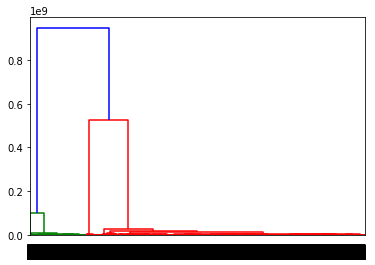

In [67]:
Z = linkage(X_scorecard, 'ward')
dn = dendrogram(Z)

In [ ]:
Z = linkage(X_scorecard, 'complete')
dn = dendrogram(Z)

In [ ]:
Z = linkage(X_scorecard, 'single',metric="cosine")


# Classification 

Re partitioning the data for different target variable. Is the person from Idaho?

In [59]:
scorecard = scorecard.drop(['SEX_2'],axis = 1)
Y_scorecard = scorecard[r'SEX_1']
X_scorecard = scorecard.drop(r'SEX_1', axis=1)

In [60]:
scaler = StandardScaler()
scaler.fit(X_scorecard)
X_scaled = scaler.transform(X_scorecard)

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, Y_scorecard, random_state=9)
Xcolnames = list(X_scaled)

# Naive Bayes

In [62]:
                                           # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [63]:
#Get accuracy score from model used above
accuracy_score(ytest, y_model)

0.7474337853250539

In [64]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7554303839002516

# Logistic Regression 

In [65]:
logreg = LogisticRegression().fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg.score(Xtest, ytest)))

Training set score: 0.830
Test set score: 0.834


In [66]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8345436238588184

In [67]:
logreg100 = LogisticRegression(C=100).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg100.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg100.score(Xtest, ytest)))

Training set score: 0.830
Test set score: 0.834


In [68]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8345436238588184

In [69]:
logreg001 = LogisticRegression(C=0.01).fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
print("Training set score: {:.3f}".format(logreg001.score(Xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg001.score(Xtest, ytest)))

Training set score: 0.829
Test set score: 0.831


In [70]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8345436238588184

# K nearest Neighbors

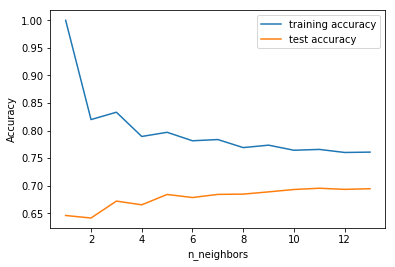

In [71]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 14
neighbors_settings = range(1, 14)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [72]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.64


In [73]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6331417156165758

In [74]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.67


In [75]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6596695318179772

In [76]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.68


In [77]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6742907785448206

In [78]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
print("Test set accuracy: {:.2f}".format(clf.score(Xtest, ytest)))

Test set accuracy: 0.68


In [79]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.6811311771782979

# Decision Tree Classifier

In [80]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.826


In [81]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8255948941974253

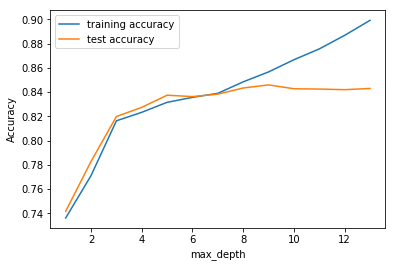

In [82]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 14
max_depth_settings = range(1, 14)

for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(Xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(clf.score(Xtrain, ytrain))
    # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, ytest))
    
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

In [83]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.836
Accuracy on test set: 0.836


In [84]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8355008331671288

In [85]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(Xtrain, ytrain)
y_model = tree.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(Xtest, ytest)))

Accuracy on training set: 0.848
Accuracy on test set: 0.843


In [86]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8423499816638893

# Random Forest

In [87]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.857


In [88]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8572032606108176

In [89]:
forest = RandomForestClassifier(n_estimators=6, random_state=0)
forest.fit(Xtrain, ytrain)
y_model = forest.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(forest.score(Xtest, ytest)))

Accuracy on training set: 0.982
Accuracy on test set: 0.814


In [90]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8122787603502519

# Gradient Boosting Classifier

In [91]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.857
Accuracy on test set: 0.860


In [92]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8589300075274559

In [93]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.827
Accuracy on test set: 0.831


In [94]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8300978890954829

In [95]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(Xtrain, ytrain)
y_model = gbrt.predict(Xtest)
print("Accuracy on training set: {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xtest, ytest)))

Accuracy on training set: 0.817
Accuracy on test set: 0.821


In [96]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8193730015247924

# Support Vector Machine

In [97]:
#DONT RUN (Unless you want to wait a really really really really long time)
svc = SVC(C=1000)
svc.fit(Xtrain, ytrain)
y_model = svc.predict(Xtest)
print("Accuracy on training set: {:.2f}".format(svc.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svc.score(Xtest, ytest)))

Accuracy on training set: 1.00
Accuracy on test set: 0.80


In [98]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.7988890568805451

# Perceptron

In [99]:
mlp = MLPClassifier(random_state=42)
mlp.fit(Xtrain, ytrain)
y_model = mlp.predict(Xtest)
print("Accuracy on training set: {:.2f}".format(mlp.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(Xtest, ytest)))

Accuracy on training set: 1.00
Accuracy on test set: 0.82


In [100]:
#get area under roc curve from model used above
roc_auc_score(ytest, y_model)

0.8174792029903944

# Discretization for Assosiation 

In [15]:
scorecard['MORTAMT1'] = pd.cut(scorecard['MORTAMT1'], bins=5, labels=False)
scorecard['MORTAMT2'] = pd.cut(scorecard['MORTAMT2'], bins=5, labels=False)
scorecard['RENT'] = pd.cut(scorecard['RENT'], bins=5, labels=False)
scorecard['COSTELEC'] = pd.cut(scorecard['COSTELEC'], bins=5, labels=False)
scorecard['COSTGAS'] = pd.cut(scorecard['COSTGAS'], bins=5, labels=False)
scorecard['COSTWATR'] = pd.cut(scorecard['COSTWATR'], bins=5, labels=False)
scorecard['COSTFUEL'] = pd.cut(scorecard['COSTFUEL'], bins=5, labels=False)
scorecard['FAMSIZE'] = pd.cut(scorecard['FAMSIZE'], bins=5, labels=False)
scorecard['ELDCH'] = pd.cut(scorecard['ELDCH'], bins=5, labels=False)
scorecard['YNGCH'] = pd.cut(scorecard['YNGCH'], bins=5, labels=False)
scorecard['AGE'] = pd.cut(scorecard['AGE'], bins=5, labels=False)
scorecard['EDUC'] = pd.cut(scorecard['EDUC'], bins=5, labels=False)
scorecard['WKSWORK2'] = pd.cut(scorecard['WKSWORK2'], bins=5, labels=False)
scorecard['UHRSWORK'] = pd.cut(scorecard['UHRSWORK'], bins=5, labels=False)
scorecard['INCTOT'] = pd.cut(scorecard['INCTOT'], bins=5, labels=False)
scorecard['FTOTINC'] = pd.cut(scorecard['FTOTINC'], bins=5, labels=False)
scorecard['INCWAGE'] = pd.cut(scorecard['INCWAGE'], bins=5, labels=False)
scorecard['INCSS'] = pd.cut(scorecard['INCSS'], bins=5, labels=False)
scorecard['INCOTHER'] = pd.cut(scorecard['INCOTHER'], bins=5, labels=False)
scorecard['TRANTIME'] = pd.cut(scorecard['TRANTIME'], bins=5, labels=False)

In [16]:
scorecard = pd.get_dummies(scorecard, columns =[u'MORTAMT1','MORTAMT2','RENT','COSTELEC','COSTGAS','COSTWATR','COSTFUEL','FAMSIZE','ELDCH','YNGCH','AGE','EDUC','WKSWORK2','UHRSWORK','INCTOT','FTOTINC','INCWAGE','INCSS','INCOTHER','TRANTIME'])

In [17]:
scorecard.head()

,STATEFIP_1,STATEFIP_2,STATEFIP_4,STATEFIP_5,STATEFIP_6,STATEFIP_8,STATEFIP_9,STATEFIP_10,STATEFIP_11,STATEFIP_12,STATEFIP_13,STATEFIP_15,STATEFIP_16,STATEFIP_17,STATEFIP_18,STATEFIP_19,STATEFIP_20,STATEFIP_21,STATEFIP_22,STATEFIP_23,STATEFIP_24,STATEFIP_25,STATEFIP_26,STATEFIP_27,STATEFIP_28,STATEFIP_29,STATEFIP_30,STATEFIP_31,STATEFIP_32,STATEFIP_33,STATEFIP_34,STATEFIP_35,STATEFIP_36,STATEFIP_37,STATEFIP_38,STATEFIP_39,STATEFIP_40,STATEFIP_41,STATEFIP_42,STATEFIP_44,STATEFIP_45,STATEFIP_46,STATEFIP_47,STATEFIP_48,STATEFIP_49,STATEFIP_50,STATEFIP_51,STATEFIP_53,STATEFIP_54,STATEFIP_55,STATEFIP_56,GQ_1,GQ_2,GQ_3,GQ_4,GQ_5,OWNERSHP_0,OWNERSHP_1,OWNERSHP_2,MORTGAGE_0,MORTGAGE_1,MORTGAGE_3,MORTGAGE_4,ACREHOUS_0,ACREHOUS_1,ACREHOUS_2,FRIDGE_0,FRIDGE_1,FRIDGE_2,PHONE_0,PHONE_1,PHONE_2,PHONE_8,CINETHH_0,CINETHH_1,CINETHH_2,CINETHH_3,CILAPTOP_0,CILAPTOP_1,CILAPTOP_2,CISMRTPHN_0,CISMRTPHN_1,CISMRTPHN_2,CITABLET_0,CITABLET_1,CITABLET_2,CIDATAPLN_0,CIDATAPLN_1,CIDATAPLN_2,CIHISPEED_0,CIHISPEED_10,CIHISPEED_20,FUELHEAT_0,FUELHEAT_1,FUELHEAT_2,FUELHEAT_3,FUELHEAT_4,FUELHEAT_5,FUELHEAT_6,FUELHEAT_7,FUELHEAT_8,FUELHEAT_9,VEHICLES_0,VEHICLES_1,VEHICLES_2,VEHICLES_3,VEHICLES_4,VEHICLES_5,VEHICLES_6,VEHICLES_9,SFTYPE_0,SFTYPE_1,SFTYPE_2,SFTYPE_3,SFTYPE_4,SFTYPE_5,SFTYPE_6,SFTYPE_7,SFTYPE_8,RELATE_1,RELATE_2,RELATE_3,RELATE_4,RELATE_5,RELATE_6,RELATE_7,RELATE_8,RELATE_9,RELATE_10,RELATE_11,RELATE_12,RELATE_13,SEX_1,SEX_2,MARRNO_0,MARRNO_1,MARRNO_2,MARRNO_3,FERTYR_0,FERTYR_1,FERTYR_2,RACE_1,RACE_2,RACE_3,RACE_4,RACE_5,RACE_6,RACE_7,RACE_8,RACE_9,HISPAN_0,HISPAN_1,HISPAN_2,HISPAN_3,HISPAN_4,CITIZEN_0,CITIZEN_1,CITIZEN_2,CITIZEN_3,SPEAKENG_0,SPEAKENG_1,SPEAKENG_3,SPEAKENG_4,SPEAKENG_5,SPEAKENG_6,HCOVANY_1,HCOVANY_2,HCOVPRIV_1,HCOVPRIV_2,HCOVPUB_1,HCOVPUB_2,SCHLTYPE_0,SCHLTYPE_1,SCHLTYPE_2,SCHLTYPE_3,DEGFIELD2_0,DEGFIELD2_11,DEGFIELD2_13,DEGFIELD2_14,DEGFIELD2_15,DEGFIELD2_19,DEGFIELD2_20,DEGFIELD2_21,DEGFIELD2_22,DEGFIELD2_23,DEGFIELD2_24,DEGFIELD2_25,DEGFIELD2_26,DEGFIELD2_29,DEGFIELD2_32,DEGFIELD2_33,DEGFIELD2_34,DEGFIELD2_35,DEGFIELD2_36,DEGFIELD2_37,DEGFIELD2_38,DEGFIELD2_40,DEGFIELD2_41,DEGFIELD2_48,DEGFIELD2_49,DEGFIELD2_50,DEGFIELD2_51,DEGFIELD2_52,DEGFIELD2_53,DEGFIELD2_54,DEGFIELD2_55,DEGFIELD2_56,DEGFIELD2_57,DEGFIELD2_59,DEGFIELD2_60,DEGFIELD2_61,DEGFIELD2_62,DEGFIELD2_64,EMPSTAT_0,EMPSTAT_1,EMPSTAT_2,EMPSTAT_3,CLASSWKR_0,CLASSWKR_1,CLASSWKR_2,MORTAMT1_0,MORTAMT1_1,MORTAMT1_2,MORTAMT1_3,MORTAMT1_4,MORTAMT2_0,MORTAMT2_1,MORTAMT2_2,MORTAMT2_3,MORTAMT2_4,RENT_0,RENT_1,RENT_2,RENT_3,RENT_4,COSTELEC_0,COSTELEC_1,COSTELEC_2,COSTELEC_3,COSTELEC_4,COSTGAS_0,COSTGAS_1,COSTGAS_2,COSTGAS_3,COSTGAS_4,COSTWATR_0,COSTWATR_1,COSTWATR_2,COSTWATR_4,COSTFUEL_0,COSTFUEL_1,COSTFUEL_2,COSTFUEL_3,COSTFUEL_4,FAMSIZE_0,FAMSIZE_1,FAMSIZE_2,FAMSIZE_3,FAMSIZE_4,ELDCH_0,ELDCH_1,ELDCH_2,ELDCH_3,ELDCH_4,YNGCH_0,YNGCH_1,YNGCH_2,YNGCH_3,YNGCH_4,AGE_0,AGE_1,AGE_2,AGE_3,AGE_4,EDUC_0,EDUC_1,EDUC_2,EDUC_3,EDUC_4,WKSWORK2_0,WKSWORK2_1,WKSWORK2_2,WKSWORK2_3,WKSWORK2_4,UHRSWORK_0,UHRSWORK_1,UHRSWORK_2,UHRSWORK_3,UHRSWORK_4,INCTOT_0,INCTOT_1,INCTOT_2,INCTOT_3,INCTOT_4,FTOTINC_0,FTOTINC_1,FTOTINC_2,FTOTINC_3,FTOTINC_4,INCWAGE_0,INCWAGE_1,INCWAGE_2,INCWAGE_3,INCWAGE_4,INCSS_0,INCSS_1,INCSS_2,INCSS_3,INCSS_4,INCOTHER_0,INCOTHER_1,INCOTHER_2,INCOTHER_3,INCOTHER_4,TRANTIME_0,TRANTIME_1,TRANTIME_2,TRANTIME_3,TRANTIME_4
1786808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
76868,0,0,1,0,0,0,0,0,0,0,0,

In [18]:
freq_scorecard=apriori(scorecard, min_support=0.001, max_len=2, use_colnames=True)
freq_scorecard['length'] = freq_scorecard['itemsets'].apply(lambda x: len(x))

In [19]:
from mlxtend.frequent_patterns import association_rules

#pd.set_option('display.max_columns', 65)
#pd.set_option('display.max_rows', 200)
rules=association_rules(freq_scorecard, metric="lift", min_threshold=2)
rules.sort_values(['lift'],ascending=False).head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1254,(YNGCH_3),(ELDCH_3),0.003358,0.003833,0.003358,1.000000,260.859504,0.003345,inf
1255,(ELDCH_3),(YNGCH_3),0.003833,0.003358,0.003358,0.876033,260.859504,0.003345,8.039577
1360,(INCWAGE_3),(INCTOT_2),0.004752,0.005988,0.004372,0.920000,153.644868,0.004344,12.425152
1361,(INCTOT_2),(INCWAGE_3),0.005988,0.004752,0.004372,0.730159,153.644868,0.004344,3.688271
551,(RELATE_4),(SFTYPE_1),0.004657,0.004974,0.001679,0.360544,72.485463,0.001656,1.556051
550,(SFTYPE_1),(RELATE_4),0.004974,0.004657,0.001679,0.337580,72.485463,0.001656,1.502585
1354,(INCWAGE_2),(INCTOT_1),0.002535,0.017013,0.002281,0.900000,52.900559,0.002238,9.829869
1355,(INCTOT_1),(INCWAGE_2),0.017013,0.002535,0.002281,0.134078,52.900559,0.002238,1.151912
1359,(FTOTINC_1),(INCTOT_2),0.015904,0.005988,0.004879,0.306773,51.232699,0.004784,1.433891
1358,(INCTOT_2),(FTOTINC_1),0.005988,0.015904,0.004879,0.814815,51.232699,0.004784,5.314117


In [20]:
rules[ rules['antecedents'] == {'UHRSWORK_1'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1332,(UHRSWORK_1),(WKSWORK2_1),0.145799,0.027595,0.010170,0.069752,2.527739,0.006147,1.045319
1335,(UHRSWORK_1),(WKSWORK2_2),0.145799,0.037226,0.016633,0.114081,3.064551,0.011205,1.086752
1336,(UHRSWORK_1),(WKSWORK2_3),0.145799,0.037638,0.015144,0.103868,2.759668,0.009656,1.073907


In [21]:
rules[ rules['antecedents'] == {'UHRSWORK_2'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [22]:
rules[ rules['antecedents'] == {'UHRSWORK_3'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1145,(UHRSWORK_3),(CLASSWKR_1),0.035135,0.080915,0.008396,0.238954,2.953150,0.005553,1.207660
1171,(UHRSWORK_3),(MORTAMT1_2),0.035135,0.023159,0.001806,0.051398,2.219310,0.000992,1.029768
1343,(UHRSWORK_3),(INCTOT_1),0.035135,0.017013,0.002344,0.066727,3.922093,0.001747,1.053268
1345,(UHRSWORK_3),(INCTOT_2),0.035135,0.005988,0.001236,0.035167,5.873044,0.001025,1.030243
1347,(UHRSWORK_3),(FTOTINC_1),0.035135,0.015904,0.001489,0.042381,2.664739,0.000930,1.027648
1349,(UHRSWORK_3),(INCWAGE_1),0.035135,0.024110,0.003580,0.101894,4.226241,0.002733,1.086609


In [23]:
rules[ rules['antecedents'] == {'UHRSWORK_4'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1147,(UHRSWORK_4),(CLASSWKR_1),0.005006,0.080915,0.001584,0.316456,3.910966,0.001179,1.344587


In [24]:
rules[ rules['antecedents'] == {'UHRSWORK_5'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [61]:
rules[ rules['antecedents'] == {'INCWAGE_1'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1116,(INCWAGE_1),(RELATE_2),0.007192,0.195412,0.002883,0.400881,2.051461,0.001478,1.342951
1686,(INCWAGE_1),(EMPSTAT_1),0.007192,0.459099,0.007033,0.977974,2.130202,0.003732,24.556907
1750,(INCWAGE_1),(CLASSWKR_1),0.007192,0.060892,0.001267,0.176211,2.893828,0.000829,1.139987
1756,(INCWAGE_1),(MORTAMT1_1),0.007192,0.127202,0.002218,0.308370,2.424257,0.001303,1.261944
1828,(INCWAGE_1),(ELDCH_0),0.007192,0.174186,0.003200,0.444934,2.554364,0.001947,1.487776
1852,(INCWAGE_1),(YNGCH_0),0.007192,0.193797,0.003390,0.471366,2.432268,0.001996,1.525068
1880,(INCWAGE_1),(AGE_2),0.007192,0.244836,0.004245,0.590308,2.411037,0.002485,1.843250
1898,(INCWAGE_1),(EDUC_4),0.007192,0.234603,0.005798,0.806167,3.436309,0.004111,3.948754
1916,(INCWAGE_1),(WKSWORK2_4),0.007192,0.387657,0.006717,0.933921,2.409143,0.003929,9.266793
1926,(INCWAGE_1),(UHRSWORK_2),0.007192,0.317165,0.004847,0.674009,2.125104,0.002566,2.094642


In [62]:
rules[ rules['antecedents'] == {'UHRSWORK_1'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1744,(UHRSWORK_1),(CLASSWKR_1),0.118046,0.060892,0.014954,0.126677,2.080357,0.007766,1.075328
1903,(UHRSWORK_1),(WKSWORK2_1),0.118046,0.023920,0.009378,0.079442,3.321192,0.006554,1.060314
1907,(UHRSWORK_1),(WKSWORK2_2),0.118046,0.031301,0.012134,0.102791,3.283908,0.008439,1.079680
1908,(UHRSWORK_1),(WKSWORK2_3),0.118046,0.030890,0.011595,0.098229,3.179989,0.007949,1.074674


In [63]:
freq_scorecard.sort_values(['support'],ascending=False).head(10)

,support,itemsets,length
196,0.991034,(MORTAMT2_0),1
171,0.974813,(DEGFIELD2_0),1
17418,0.966449,"(DEGFIELD2_0, MORTAMT2_0)",2
257,0.951717,(FTOTINC_0),1
51,0.950925,(GQ_1),1
67,0.950101,(FRIDGE_2),1
5633,0.950070,"(FTOTINC_0, GQ_1)",2
7688,0.949056,"(FTOTINC_0, FRIDGE_2)",2
5452,0.948264,"(GQ_1, FRIDGE_2)",2
109,0.947377,(SFTYPE_0),1


In [64]:

pd.set_option('display.max_rows', 20)
rules[ rules['consequents'] == {'UHRSWORK_1'} ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1745,(CLASSWKR_1),(UHRSWORK_1),0.060892,0.118046,0.014954,0.245578,2.080357,0.007766,1.169045
1902,(WKSWORK2_1),(UHRSWORK_1),0.023920,0.118046,0.009378,0.392053,3.321192,0.006554,1.450709
1906,(WKSWORK2_2),(UHRSWORK_1),0.031301,0.118046,0.012134,0.387652,3.283908,0.008439,1.440282
1909,(WKSWORK2_3),(UHRSWORK_1),0.030890,0.118046,0.011595,0.375385,3.179989,0.007949,1.411996
